In [ ]:
%cd ../

In [1]:
from tvDatafeed import TvDatafeed, Interval
from dotenv import load_dotenv
import os
import pandas as pd
import pyutil
import backtrader as bt
import numpy as np
import talib as ta
import json
import pickle
import datetime
from tabulate import tabulate
from prettytable import PrettyTable
import tenxsqueeze as txs
import inspect
import seaborn as sns
from tqdm import tqdm

load_dotenv()

sp500_5m = pd.read_pickle("sp500_5m_clean.pkl")
amzn_5m = pd.read_pickle("AMZN_May_Aug_2022_5min.pkl")
data_5m = txs.stf.add_signal(sp500_5m["AAPL"])
data_60m = txs.stf.add_signal(txs.stf.agg_ohlcv(sp500_5m["AAPL"], "60min"))
data_30m = txs.stf.add_signal(txs.stf.agg_ohlcv(sp500_5m["AAPL"], "30min"))
data_15m = txs.stf.add_signal(txs.stf.agg_ohlcv(sp500_5m["AAPL"], "15min"))


In [13]:
stf_consecutive = txs.common.launch_mp_job(sp500_5m, txs.stf.analyze_ticker_consecutive, N_range=[1, 2, 3, 4, 5, 6, 7], T_range=[5, 10, 15, 30])
pd.DataFrame(stf_consecutive).to_pickle("stf_consecutive.pkl")
del stf_consecutive
print("stf_consecutive done")

100%|██████████| 488/488 [10:35<00:00,  1.30s/it]


stf_consecutive done


In [14]:
stf_partial = txs.common.launch_mp_job(sp500_5m, txs.stf.analyze_ticker_partial, NQ_range=[(2, 3), (3, 5), (4, 7), (5, 8), (6, 9)], T_range=[5, 10, 15, 30])
pd.DataFrame(stf_partial).to_pickle("stf_partial.pkl")
del stf_partial
print("stf_consecutive done")

100%|██████████| 488/488 [07:29<00:00,  1.09it/s]


stf_consecutive done


In [15]:
mtf_consecutive = txs.common.launch_mp_job(sp500_5m, txs.mtf.analyze_ticker_consecutive, N_range=[1, 2, 3, 4, 5, 6, 7], T_range=[5, 10, 15, 30])
pd.DataFrame(mtf_consecutive).to_pickle("mtf_consecutive.pkl")
del mtf_consecutive
print("mtf_consecutive done")

100%|██████████| 488/488 [19:01<00:00,  2.34s/it]


mtf_consecutive done


In [17]:
mtf_partial = txs.common.launch_mp_job(sp500_5m, txs.mtf.analyze_ticker_partial, N_range=[1, 2, 3, 4, 5, 6, 7], thresh_range=[0.249, 0.499, 0.749], T_range=[5, 10, 15, 30])
pd.DataFrame(mtf_partial).to_pickle("mtf_partial.pkl")
del mtf_partial
print("mtf_partial done")

100%|██████████| 488/488 [1:04:06<00:00,  7.88s/it]


mtf_partial done


In [ ]:
txs.mtf.analyze_ticker_partial(("AAPL", sp500_5m["AAPL"]), [1, 2, 3], [0.249, 0.499, 0.749], [5])

In [ ]:
df = pd.concat([data_5m.big3, data_15m.big3, data_30m.big3, data_60m.big3], keys=["5m", "15m", "30m", "60m"], axis=1).ffill()
pyutil.plotting.plot_df(df, df.index, ["5m", "15m", "30m", "60m"], update_layout_kwargs={"height": 500}, scatter_kwargs=[{"mode": "markers"}] * 4)

In [ ]:
DATAS = [data_5m, data_15m, data_30m, data_60m]

txs.mtf.get_partial_groups(DATAS[:3], 1, thresh=0.66)

[                     big3  big3  big3
 datetime                             
 2023-06-28 10:20:00   1.0   1.0   0.0,
                      big3  big3  big3
 datetime                             
 2023-07-13 15:30:00   0.0   1.0   1.0,
                      big3  big3  big3
 datetime                             
 2023-07-14 09:45:00   0.0   2.0   1.0,
                      big3  big3  big3
 datetime                             
 2023-07-14 10:15:00   0.0   2.0   1.0,
                      big3  big3  big3
 datetime                             
 2023-09-01 09:45:00   1.0   1.0   0.0,
                      big3  big3  big3
 datetime                             
 2023-09-01 09:55:00   1.0   1.0   0.0,
                      big3  big3  big3
 datetime                             
 2023-09-01 10:30:00   1.0   0.0   1.0,
                      big3  big3  big3
 datetime                             
 2023-09-01 12:15:00   0.0   1.0   1.0]

<Axes: xlabel='datetime'>

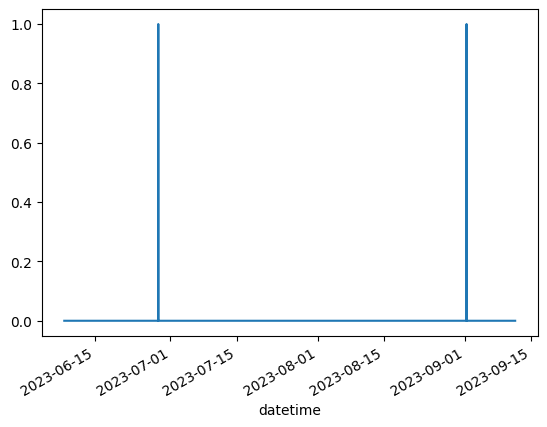

In [ ]:
(pd.concat(DATAS[:2], axis=1).big3.ffill() > 0).all(axis=1).astype(int).plot()

In [ ]:
pd.concat([data_5m.big3, data_15m.big3, data_30m.big3, data_60m.big3], keys=["5m", "15m", "30m", "60m"], axis=1).ffill()

In [ ]:
(df > 1).all(axis=1)

datetime
2023-06-08 14:30:00    False
2023-06-08 14:45:00    False
2023-06-08 14:55:00    False
2023-06-08 15:00:00    False
2023-06-08 15:05:00    False
                       ...  
2023-09-11 15:35:00    False
2023-09-11 15:40:00    False
2023-09-11 15:45:00    False
2023-09-11 15:50:00    False
2023-09-11 15:55:00    False
Length: 4970, dtype: bool

In [ ]:
pd.concat([data_5m, data_60m], axis=1).head(20)

,open,high,low,close,volume,big3,open,high,low,close,big3
datetime,,,,,,,,,,,
2023-06-08 14:30:00,NaN,NaN,NaN,NaN,NaN,NaN,180.15,180.29,179.73,180.255,0.0
2023-06-08 14:55:00,180.150,180.240,179.93,179.930,116150.0,0.0,NaN,NaN,NaN,NaN,NaN
2023-06-08 15:00:00,179.930,180.015,179.84,179.860,74988.0,0.0,NaN,NaN,NaN,NaN,NaN
2023-06-08 15:05:00,179.860,179.930,179.73,179.930,68028.0,0.0,NaN,NaN,NaN,NaN,NaN
2023-06-08 15:10:00,179.930,180.000,179.89,179.890,43658.0,0.0,NaN,NaN,NaN,NaN,NaN
2023-06-08 15:15:00,179.890,180.135,179.89,180.120,119375.0,0.0,NaN,NaN,NaN,NaN,NaN
2023-06-08 15:20:00,180.125,180.290,180.09,180.250,100689.0,0.0,NaN,NaN,NaN,NaN,NaN
2023-06-08 15:25:00,180.250,180.265,180.09,180.255,62031.0,0.0,NaN,NaN,NaN,NaN,NaN
2023-06-08 15:30:00,180.250,180.370,180.21,180.350,109023.0,0.0,180.25,180.84,180.21,180.560,0.0


In [ ]:
df.ffill()

,5m,15m,30m,60m
datetime,,,,
2023-06-08 14:00:00,NaN,NaN,NaN,0.0
2023-06-08 14:30:00,NaN,NaN,0.0,0.0
2023-06-08 14:45:00,NaN,0.0,0.0,0.0
2023-06-08 14:55:00,0.0,0.0,0.0,0.0
2023-06-08 15:00:00,0.0,0.0,0.0,0.0
2023-06-08 15:05:00,0.0,0.0,0.0,0.0
2023-06-08 15:10:00,0.0,0.0,0.0,0.0
2023-06-08 15:15:00,0.0,0.0,0.0,0.0
2023-06-08 15:20:00,0.0,0.0,0.0,0.0


In [ ]:
txs.mtf.get_consecutive_holds(("AAPL", sp500_5m["AAPL"]), [1, 2, 3], [5])

[{'ticker': 'AAPL',
  'n_tfs': 2,
  'N': 1,
  'T': 5,
  'min': 0.0,
  'max': 0.0,
  'final': 0.0,
  'start': Timestamp('2023-06-28 10:15:00'),
  'end': Timestamp('2023-06-28 10:15:00'),
  'dir': 1.0},
 {'ticker': 'AAPL',
  'n_tfs': 2,
  'N': 2,
  'T': 5,
  'min': 0.0,
  'max': 0.0,
  'final': 0.0,
  'start': Timestamp('2023-06-28 10:15:00'),
  'end': Timestamp('2023-06-28 10:30:00'),
  'dir': 1.0},
 {'ticker': 'AAPL',
  'n_tfs': 2,
  'N': 3,
  'T': 5,
  'min': 0.0,
  'max': 0.0,
  'final': 0.0,
  'start': Timestamp('2023-06-28 10:15:00'),
  'end': Timestamp('2023-06-28 10:45:00'),
  'dir': 1.0}]